In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger


%matplotlib inline
import json
import string
df = pd.read_json("Data_cyb.json", lines = True, orient = "columns")
df['rating'] = df.annotation[0]["label"][0]
df.head(2)

,annotation,content,extras,rating
0,"{'notes': '', 'label': ['1']}",Get fucking real dude.,NaN,1
1,"{'notes': '', 'label': ['1']}",She is as dirty as they come and that crook ...,NaN,1


In [2]:
new_df = df[["content", "rating"]]
new_df["word_count"] = new_df["content"].str.split().apply(len)
word_count = {}
counting = new_df["content"].str.split()
for sentence in counting:
   for word in sentence:
       if word.lower() in sentence:
           if word.lower() not in word_count:
               word_count[word.lower()] = 1
           else:
               word_count[word.lower()] += 1
print(word_count)

C:\Users\karaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{'fucking': 820, 'real': 83, 'dude.': 28, 'is': 2418, 'as': 615, 'dirty': 18, 'they': 737, 'come': 163, 'and': 3267, 'that': 3151, 'crook': 3, 'the': 5906, 'are': 1085, 'so': 1164, 'corrupt': 5, "it's": 457, 'a': 5178, 'joke.': 6, 'look': 181, 'like': 1325, '...': 162, 'why': 317, 'did': 330, 'you': 5726, 'fuck': 849, 'it': 2595, 'up.': 81, 'could': 301, 'do': 1243, 'all': 786, 'day': 191, 'too.': 172, 'when': 776, 'have': 1449, 'an': 423, 'hour.': 16, 'me': 1401, 'later': 27, 'to': 5185, 'sched': 3, 'writing': 22, 'book': 49, 'here.': 59, 'dont': 321, 'finish': 17, 'enclosing': 3, 'showers.': 5, 'hate': 2424, 'half': 49, 'assed': 3, 'jobs.': 11, 'reasononing': 3, 'behind': 25, 'it?': 96, 'no': 596, 'sense.': 11, 'talking': 86, 'about': 734, 'men': 20, 'thats': 181, 'not': 1017, 'menage': 3, "that's": 255, 'just': 1137, 'gay.': 73, 'save': 27, 'trouble': 16, 'sister.': 10, 'here': 230, 'comes': 50, 'big': 178, 'ol': 10, 'block': 11, 'coming': 72, 'your': 1736, 'way': 238, 'on': 1696, '

In [3]:
msg_dict ={}
messages = []
for i in df["content"]:
   messages.append(i)
msg_dict["messages"] = messages
rating = []
for i in df["annotation"]:
   rating.append(i["label"][0])
msg_dict["rating"] = rating
msg_df = pd.DataFrame(msg_dict)
word_count = {}
counting = msg_df["messages"].str.split()
for sentence in counting:
   for word in sentence:
       if word.lower() in sentence:
           if word.lower() not in word_count:
               word_count[word.lower()] = 1
           else:
               word_count[word.lower()] += 1
word_count_df = pd.DataFrame([word_count])
word_count_df_T = word_count_df.T.reset_index()
word_count_df_T.columns = ["words", "word_count"]
word_count_df_T.sort_values(by="word_count", ascending=False, inplace=True)

In [4]:
msg_df.tail(2)

,messages,rating
19999,What&;s something unique about Ohio? :),0
20000,Who is the biggest gossiper you know?,0


In [5]:
msg_df['messages'][5783]
#[3278][5783]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [7]:
msg_df['tidy_messages'] = np.vectorize(remove_pattern)(msg_df['messages'], "@[\w]*")
msg_df['tidy_messages'][5783]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [8]:
# remove special characters, numbers, punctuations
msg_df['tidy_messages'] = msg_df['messages'].str.replace("[^a-zA-Z#]", " ")
msg_df['messages'][5783]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [9]:
msg_df['tidy_messages'] = msg_df['messages'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
msg_df['messages'][5783]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [10]:
msg_df['tidy_messages'][:5].apply(lambda x: str(TextBlob(x).correct()))
msg_df['messages'][5783]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [11]:
msg_df.head(2)

,messages,rating,tidy_messages
0,Get fucking real dude.,1,fucking real dude.
1,She is as dirty as they come and that crook ...,1,dirty they come that crook Rengel Dems fucking...


In [12]:
#msg_df['corrected_words'] = msg_df.tidy_messages.apply(lambda x: spell_correct(x))

In [13]:
# tokenized messages = individual terms or words
tokenized_messages = msg_df['tidy_messages'].apply(lambda x: x.split())
tokenized_messages.head()
msg_df['messages'][3278]

'what da drilly wit dat do! ...oh  and i STILL got distribution in Japan...damn  that chick was the worst that night'

In [14]:
#print(msg_df['rating'])

In [15]:
#sns.countplot(x='rating', data=msg_df)
#plt.show()

In [16]:
msg_df['tidy_messages'][5783], 
#[3278]

('what drilly ...oh STILL distribution Japan...damn that chick worst that night',)

In [17]:
text_blob_object = TextBlob(msg_df['tidy_messages'][2])
print(text_blob_object.sentiment)

Sentiment(polarity=-0.2, subjectivity=0.3)


In [18]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

msg_df['Sentiment_Polarity'] = msg_df['tidy_messages'].apply(find_pol)
msg_df.head()

,messages,rating,tidy_messages,Sentiment_Polarity
0,Get fucking real dude.,1,fucking real dude.,0.200000
1,She is as dirty as they come and that crook ...,1,dirty they come that crook Rengel Dems fucking...,-0.550000
2,why did you fuck it up. I could do it all day...,1,fuck could too. Let's when have hour. Ping lat...,-0.200000
3,Dude they dont finish enclosing the fucking s...,1,Dude they dont finish enclosing fucking shower...,-0.491667
4,WTF are you talking about Men? No men thats n...,1,talking about Men? thats menage that's just gay.,0.416667


In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error([1,2],[1,1.9])

0.005000000000000009

In [21]:
most_negative = msg_df[msg_df.Sentiment_Polarity == -1].tidy_messages.head()
print(most_negative)

94     'Night Guy' motivated 11pm knows 'Morning Guy'...
129                                  knw!!!!! hate that!
162                            women fucking disgusting.
216                well have edit myself know hate that!
278           that's shame hate having unfollow someone!
Name: tidy_messages, dtype: object


In [22]:
most_positive = msg_df[msg_df.Sentiment_Polarity == 1].tidy_messages.head()
print(most_positive)

103           shame? Lol! that like aardvark discontent?
124          They have best this side fourteenth street.
215                                  emo. fucking happy!
329    Did...I mention that among disciplines Dementa...
458    dude talk about universe #LeWeb awesome. nerd ...
Name: tidy_messages, dtype: object


In [23]:
neutral = msg_df[msg_df.Sentiment_Polarity == 0].tidy_messages.head()
print(neutral)

10    truth both counts that their product par. tell...
11                                    Shakespeare nerd!
14                        damn totally forgot that one!
15                  damn would have been pissed that...
23                                     that karma bitch
Name: tidy_messages, dtype: object


In [24]:
for i in range(len(tokenized_messages)):
    tokenized_messages[i] = ' '.join(tokenized_messages[i])

msg_df['tidy_messages'] = tokenized_messages

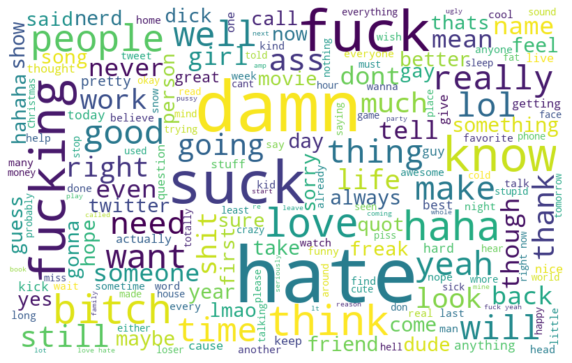

In [25]:
all_words = ' '.join([text for text in msg_df['tidy_messages']])
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color = 'white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

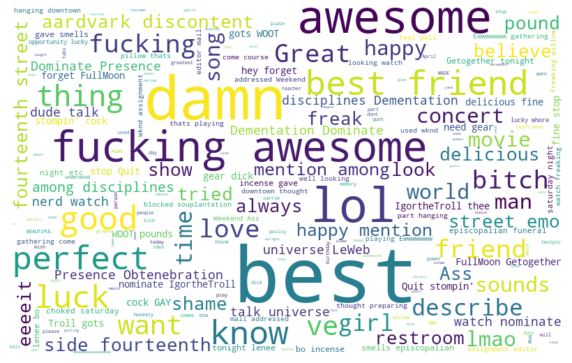

In [26]:
#Words in non racist/sexist [Posivite]
from bidi.algorithm import get_display
normal_words =' '.join([text for text in msg_df['tidy_messages'][msg_df['Sentiment_Polarity'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color ='white').generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

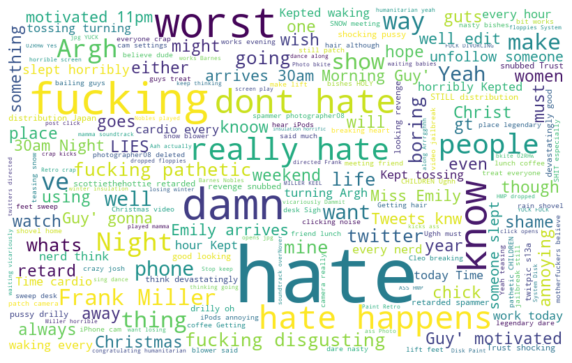

In [27]:

negative_words = ' '.join([text for text in msg_df['tidy_messages'][msg_df['Sentiment_Polarity'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, background_color = 'white').generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

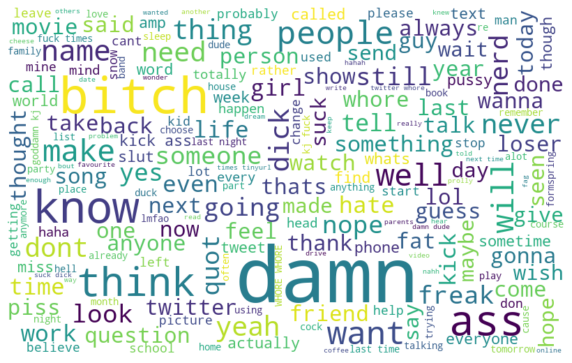

In [30]:
from PIL import Image # to import the image
from wordcloud import WordCloud, ImageColorGenerator
#wave_mask = np.array(Image.open( "bubbles.png"))

neutral = ' '.join([text for text in msg_df['tidy_messages'][msg_df['Sentiment_Polarity'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, background_color = 'white').generate(neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()